In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook


5.707728735353045 0.3410426821678615
4.76221115900674 0.014922291993720561
1.1985459159151424 22.854577722468868


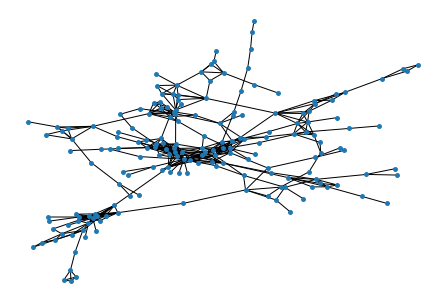

In [4]:
ref = nx.read_graphml('runs/graphs/m251.graphml')
# ref = nx.read_graphml('hepth/graphs/0.graphml')

nx.draw(ref, node_size=15)

true_len = nx.average_shortest_path_length(ref)
true_clus = nx.average_clustering(ref)

lens = []
clusts = []

for _ in tqdm_notebook(range(50)):
    rand = nx.erdos_renyi_graph(ref.number_of_nodes(), ref.number_of_edges() / ref.number_of_nodes()**2)
#     rand = nx.random_reference(ref)
    while not nx.is_connected(rand):
        rand = nx.erdos_renyi_graph(ref.number_of_nodes(), ref.number_of_edges() / ref.number_of_nodes()**2)
#         rand = nx.random_reference(ref)
    lens.append(nx.average_shortest_path_length(rand))
    clusts.append(nx.average_clustering(rand))
    
ref_len = sum(lens) / len(lens)
ref_clus = sum(clusts) / len(clusts)

print(true_len, true_clus)
print(ref_len, ref_clus)
print(true_len / ref_len, true_clus / ref_clus)

182
5.593406593406593
0.015366501630237894
5.707728735353045 0.3410426821678615


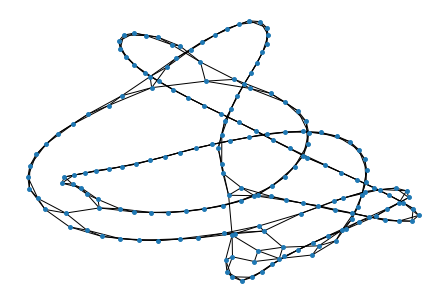

182
4.0
0.01098901098901099
12.27727521097687 0.48333333333333334


In [5]:
print(ref.number_of_nodes())
print(sum(dict(ref.degree()).values()) / len(ref.degree()))
print(ref.number_of_edges() / ref.number_of_nodes()**2)
print(nx.average_shortest_path_length(ref), nx.average_clustering(ref))

small = nx.connected_watts_strogatz_graph(ref.number_of_nodes(), 
                                          int(sum(dict(ref.degree()).values()) / len(ref.degree())), 
                                          ref.number_of_edges() / ref.number_of_nodes()**2)

true_len = nx.average_shortest_path_length(small)
true_clus = nx.average_clustering(small)

nx.draw(small, node_size=15)
plt.show()
        
print(small.number_of_nodes())
print(sum(dict(small.degree()).values()) / len(small.degree()))
print(small.number_of_edges() / small.number_of_nodes()**2)
print(true_len, true_clus)